In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets

In [2]:
import os

In [5]:
os.chdir('data')

In [8]:
data_path = os.getcwd()

In [9]:
data_path

'C:\\Users\\An_asus\\Desktop\\Programming\\JupyterNotebook\\pytorch\\data'

In [10]:
cifar10 = datasets.CIFAR10(data_path, train=True, download=True)
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True)


Extracting C:\Users\An_asus\Desktop\Programming\JupyterNotebook\pytorch\data\cifar-10-python.tar.gz to C:\Users\An_asus\Desktop\Programming\JupyterNotebook\pytorch\data
Files already downloaded and verified


In [11]:
len(cifar10)

50000

In [12]:
len(cifar10_val)

10000

In [17]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [19]:
img, label = cifar10[99]

In [20]:
img, label, class_names[label]

(<PIL.Image.Image image mode=RGB size=32x32 at 0x17013F51708>, 1, 'automobile')

In [21]:
import matplotlib.pyplot as plt

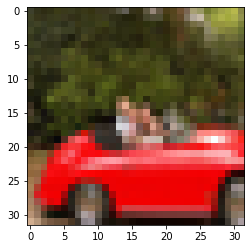

In [23]:
plt.imshow(img)
plt.show()

In [24]:
from torchvision import transforms

In [29]:
to_tensor = transforms.ToTensor()

In [30]:
img_t = to_tensor(img)

In [32]:
img_t.shape

torch.Size([3, 32, 32])

In [33]:
tensor_cifar10 = datasets.CIFAR10(data_path, train=True, download=False,
                                 transform=transforms.ToTensor())

In [35]:
img_t, _ = tensor_cifar10[99]

In [38]:
img_t.shape

torch.Size([3, 32, 32])

In [39]:
img_t.min(), img_t.max()

(tensor(0.), tensor(1.))

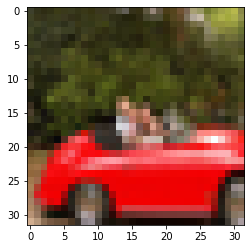

In [41]:
plt.imshow(img_t.permute(1, 2, 0))
plt.show()

In [46]:
imgs = torch.stack([img_t for img_t, _ in tensor_cifar10], dim=3)
imgs.shape

torch.Size([3, 32, 32, 50000])

In [55]:
imgs.view(3, -1).mean(dim=1)

tensor([0.4914, 0.4822, 0.4465])

In [56]:
imgs.view(3, -1).std(dim=1)

tensor([0.2470, 0.2435, 0.2616])

In [57]:
transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))

Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.247, 0.2435, 0.2616))

In [58]:
transformed_cifar10 = datasets.CIFAR10(data_path, train=True, download=False,
                            transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.4914, 0.4822, 0.4465),
                                                     (0.2470, 0.2435, 0.2616))
                            ])
                        )

In [87]:
transformed_cifar10_val = datasets.CIFAR10(data_path, train=False, download=False,
                            transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.4914, 0.4822, 0.4465),
                                                     (0.2470, 0.2435, 0.2616))
                            ])
                        )

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


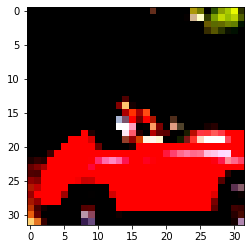

In [60]:
img_t, _ = transformed_cifar10[99]

plt.imshow(img_t.permute(1, 2, 0))
plt.show()

In [61]:
class_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [88]:
label_map = {0: 0, 2 : 1}
class_names_cifar2 = ['airplane', 'bird']

cifar2 = [(img, label_map[label]) for img, label in transformed_cifar10 if label in [0, 2]]

cifar2_val = [(img, label_map[label]) for img, label in transformed_cifar10_val if label in [0, 2]]

In [66]:
def softmax(x):
    return torch.exp(x) / torch.exp(x).sum()

In [72]:
x = torch.tensor([[0.123533, 6.123, -.6777],
                  [19, 0.9122, 6.521]])

softmax(x)

tensor([[2.4712e-03, 9.9642e-01, 1.1090e-03],
        [1.0000e+00, 1.3950e-08, 3.8057e-06]])

In [76]:
softmax = nn.Softmax(dim=1)

In [77]:
softmax(x)

tensor([[2.4712e-03, 9.9642e-01, 1.1090e-03],
        [1.0000e+00, 1.3950e-08, 3.8057e-06]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


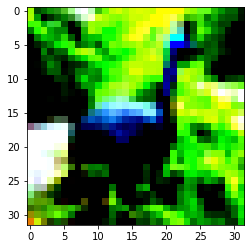

In [89]:
img, _ = cifar2[0]

plt.imshow(img.permute(1,2,0))

plt.show()

In [94]:
img_batch = img.view(-1).unsqueeze(0)

In [95]:
out = seq_model(img_batch)
out

tensor([[0.4393, 0.5607]], grad_fn=<SoftmaxBackward>)

In [99]:
index = torch.argmax(out, dim=1)

index

tensor([1])

In [101]:
criterion = nn.NLLLoss()

In [102]:
img, label = cifar2[0]

out = seq_model(img.view(-1).unsqueeze(0))

criterion(out, torch.tensor([label]))

tensor(0.7089, grad_fn=<NllLossBackward>)

In [153]:
learning_rate = 1e-3

optimizer = optim.SGD(seq_model.parameters(), lr=learning_rate)

In [148]:
n_epochs = 10

In [154]:
seq_model = nn.Sequential(
            nn.Linear(32*32*3, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.LogSoftmax(dim=1)
).to('cuda')

In [155]:
for epoch in range(n_epochs):
    for img, label in cifar2:
        img = img.to('cuda')
        label = torch.tensor([label]).to('cuda')
        
        out = seq_model(img.view(-1).unsqueeze(0))
        
        loss = criterion(out, label)
        
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
    
    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 1.299348
Epoch: 1, Loss: 1.299348
Epoch: 2, Loss: 1.299348
Epoch: 3, Loss: 1.299348
Epoch: 4, Loss: 1.299348
Epoch: 5, Loss: 1.299348
Epoch: 6, Loss: 1.299348
Epoch: 7, Loss: 1.299348
Epoch: 8, Loss: 1.299348
Epoch: 9, Loss: 1.299348


In [156]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)

In [166]:
seq_model = nn.Sequential(
nn.Linear(3072, 1024),
nn.Tanh(),
nn.Linear(1024, 512),
nn.Tanh(),
nn.Linear(512, 128),
nn.Tanh(),
nn.Linear(128, 2)).to('cuda')

criterion = nn.CrossEntropyLoss()

learning_rate = 1e-2

optimizer = optim.SGD(seq_model.parameters(), lr=learning_rate)

#criterion = nn.NLLLoss()

n_epochs = 100

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        imgs = imgs.to('cuda')
        labels = labels.to('cuda')
        
        batch_size = imgs.shape[0]
        
        out = seq_model(imgs.view(batch_size, -1))
        
        loss = criterion(out, labels)
        
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.631710
Epoch: 1, Loss: 0.611574
Epoch: 2, Loss: 0.391519
Epoch: 3, Loss: 0.246245
Epoch: 4, Loss: 0.345660
Epoch: 5, Loss: 0.310811
Epoch: 6, Loss: 0.281890
Epoch: 7, Loss: 0.369852
Epoch: 8, Loss: 0.230519
Epoch: 9, Loss: 0.296403
Epoch: 10, Loss: 0.510833
Epoch: 11, Loss: 0.495045
Epoch: 12, Loss: 0.255248
Epoch: 13, Loss: 0.364004
Epoch: 14, Loss: 0.238532
Epoch: 15, Loss: 0.354213
Epoch: 16, Loss: 0.211912
Epoch: 17, Loss: 0.448118
Epoch: 18, Loss: 0.153883
Epoch: 19, Loss: 0.127892
Epoch: 20, Loss: 0.212138
Epoch: 21, Loss: 0.346499
Epoch: 22, Loss: 0.502575
Epoch: 23, Loss: 0.228854
Epoch: 24, Loss: 0.313813
Epoch: 25, Loss: 0.607845
Epoch: 26, Loss: 0.378897
Epoch: 27, Loss: 0.356550
Epoch: 28, Loss: 0.665416
Epoch: 29, Loss: 0.416856
Epoch: 30, Loss: 0.184586
Epoch: 31, Loss: 0.186432
Epoch: 32, Loss: 0.268782
Epoch: 33, Loss: 0.057799
Epoch: 34, Loss: 0.083409
Epoch: 35, Loss: 0.264875
Epoch: 36, Loss: 0.151231
Epoch: 37, Loss: 0.175401
Epoch: 38, Loss: 0.126

In [167]:
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        imgs = imgs.to('cuda')
        labels = labels.to('cuda')
        
        batch_size = imgs.shape[0]
        outputs = seq_model(imgs.view(batch_size, -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 0.802500


In [169]:
numel_list = [p.numel()
    for p in seq_model.parameters()
    if p.requires_grad == True]
sum(numel_list), numel_list

(3737474, [3145728, 1024, 524288, 512, 65536, 128, 256, 2])